**Data Vizulization Assignment Haberman Dataset**

*Dataset:* https://www.kaggle.com/gilsousa/habermans-survival-data-set

In [1]:
#Importing dataset file.
from google.colab import files
files = files.upload()

Saving haberman.csv to haberman.csv


In [3]:
#Importing required libraries to do EDA and creating Dataframe 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
haberman_df = pd.read_csv('haberman.csv')
haberman_df.head()


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


306 points
4 features

# 1. Familiarizing with given dataset


In [ ]:
#Number of Total points and Number of given columns
print(haberman_df.shape)

(306, 4)


In [ ]:
#columns in dataset
print(haberman_df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [ ]:
#To check if dataset is balanced/imbalanced
haberman_df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

**observation**: 


*   Given Haberman dataset is Imbalanced Dataset as
*   Class 1 : 225 points and Class 2 : 81 points





In [ ]:
#Check if dataset has any null values
haberman_df.isnull()
haberman_df.notnull()
#returns true if atleast single point has null value
haberman_df.isnull().values.any()

False

**Obervation:** Given dataset don't have null values, No Data tranformation needed to fill up null values

# 2. 2d Scatter Plots

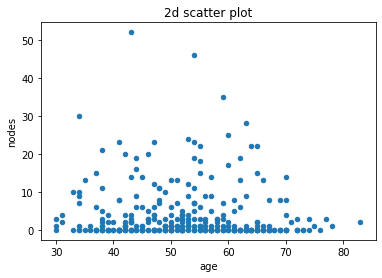

In [ ]:
# Graph1 2D scatter plot of features Age and Nodes
haberman_df.plot(kind='scatter',x='age',y='nodes')
plt.title('2d scatter plot')
plt.show()

Observation : Can see outliers for nodes, but can't gain much information from the 2-d scatter plot

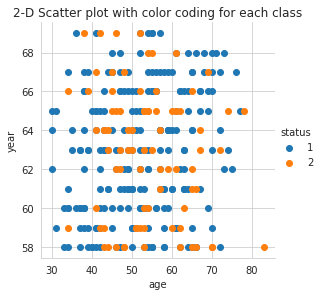

In [ ]:
#Graph2 2-D Scatter plot with color-coding for age and year
sns.set_style('whitegrid')
sns.FacetGrid(haberman_df, hue="status", size=4).map(plt.scatter,"age","year").add_legend()
plt.title("2-D Scatter plot with color coding for each class")
plt.show()

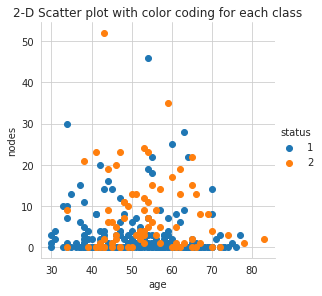

In [ ]:
#Graph3 2-D Scatter plot with color-coding for age and nodes
sns.set_style('whitegrid')
sns.FacetGrid(haberman_df, hue="status", size=4).map(plt.scatter,"age","nodes").add_legend()
plt.title("2-D Scatter plot with color coding for each class")
plt.show()

**Observation**:  

1. Plot doesn't give much information.
2. Not able to establish relationship between different features yet as there is overlap of data
3. Can notice some of points which are outliers. 





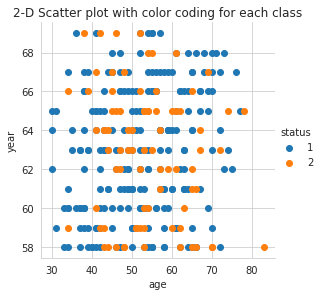

In [5]:
#Graph4 2-D Scatter plot with color-coding for age and year
sns.set_style('whitegrid')
sns.FacetGrid(haberman_df, hue="status", size=4).map(plt.scatter,"age","year").add_legend()
plt.title("2-D Scatter plot with color coding for each class")
plt.show()

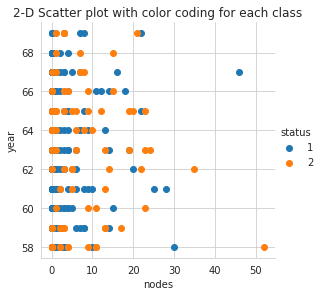

In [6]:
#Graph5 2-D Scatter plot with color-coding for age and year
sns.set_style('whitegrid')
sns.FacetGrid(haberman_df, hue="status", size=4).map(plt.scatter,"nodes","year").add_legend()
plt.title("2-D Scatter plot with color coding for each class")
plt.show()

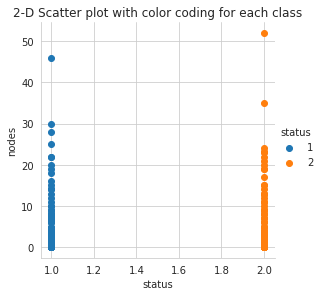

In [ ]:
#Graph6 2-D Scatter plot with color-coding for age and year
sns.set_style('whitegrid')
sns.FacetGrid(haberman_df, hue="status", size=4).map(plt.scatter,"status","nodes").add_legend()
plt.title("2-D Scatter plot with color coding for each class")
plt.show()

**Observation**


1.   From the 2d Scatter plot of status and nodes Graph6 as the number of nodes increased we see status 1 and only 2 points in status 2 which may or may not be outliers.
2. Except for the Graph6 in 2d scatter plot, Data is not linearly seprable.




# 3. 3d Scatter plot

In [ ]:
#Graph1 3d scatter plot
import plotly.express as px
fig = px.scatter_3d(haberman_df,x="year",y="age",z="nodes",color="status")
fig.show()

**Observation**: Not able to get much information from given dataset through 3d plot

 

*   Points are overlapping, Hence to check with pair plots to find which features contributes most to classify record.





# 4. Pair Plots

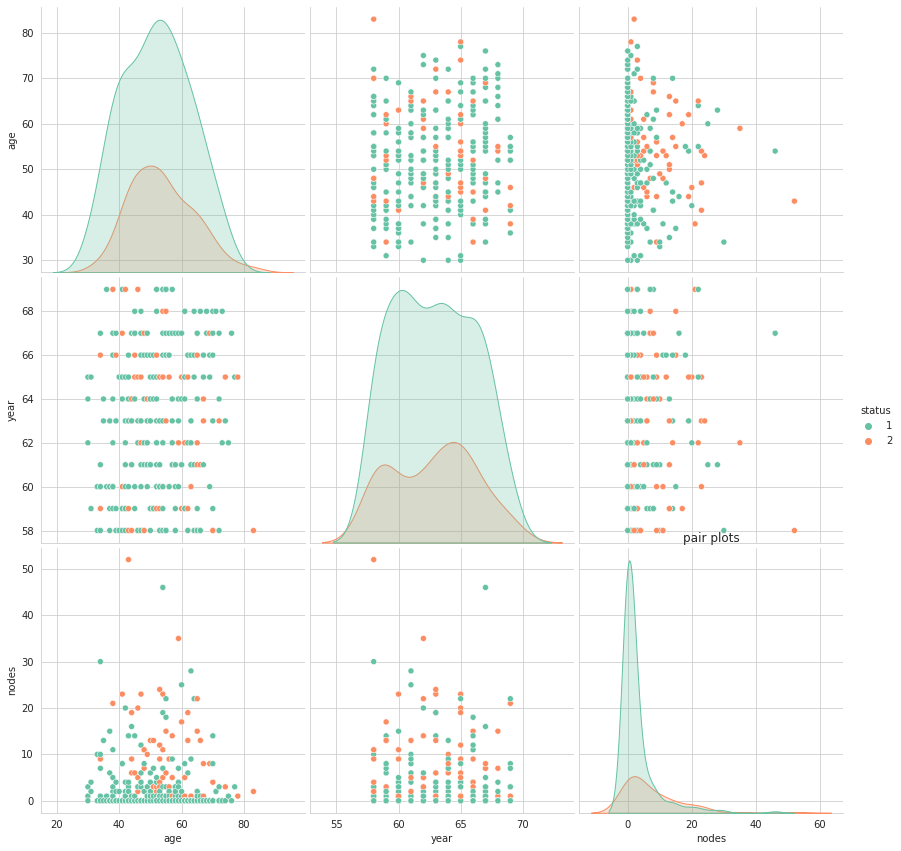

In [ ]:
#Graph1 Bivariate Analysis using pair plots
plt.close()
sns.set_style('whitegrid')
sns.pairplot(haberman_df,hue='status', size=4, palette="Set2")
plt.title('pair plots')
plt.show()

**Observation from Pair plots**

1.   We can see survival rate of the patients after surgery is very less by observing pdf's of the plots(This might also be due to imbalanced dataset)
2. Survival rate of the person is very less with large number of nodes even after surgery




# 1D Scatter Plot

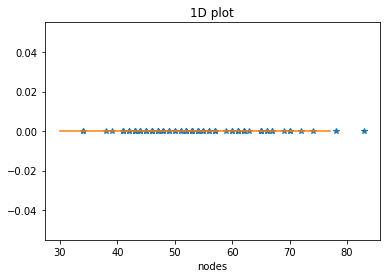

In [ ]:
#Graph1 1D scatter plot.
import numpy as np
haberman_sucess =  haberman_df.loc[haberman_df["status"]==2]
haberman_failure = haberman_df.loc[haberman_df["status"]==1]
plt.plot(haberman_sucess["age"],np.zeros_like(haberman_sucess["nodes"]),'*')
plt.plot(haberman_failure["age"],np.zeros_like(haberman_failure["nodes"]),'-')
plt.title('1D plot')
plt.xlabel('nodes')
plt.show()

**Observation: from 1D Scatterplot Graph1**

*   In this 1D scatter plot graph, we can clearly make out people who had less number of nodes survived after operation after 5 years.



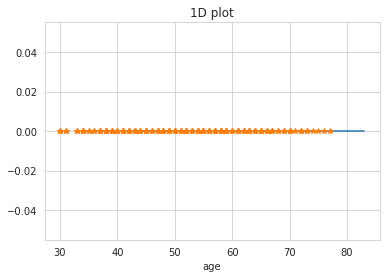

In [9]:
#Graph2 1D scatter plot for Age based on the status
import numpy as np
haberman_sucess =  haberman_df.loc[haberman_df["status"]==2]
haberman_failure = haberman_df.loc[haberman_df["status"]==1]
plt.plot(haberman_sucess["age"],np.zeros_like(haberman_sucess["age"]),'-')
plt.plot(haberman_failure["age"],np.zeros_like(haberman_failure["age"]),'*')
plt.title('1D plot')
plt.xlabel('age')
plt.show()

**Observation: Graph2 1D Scatterplot** 
*   It is hard to differentiate datapoints as it's overlapping heavily.

*  Can notice success rate is less after age around 75, from the above graph (This is observation based on the given dataset this might be due to imbalanced dataset as well.



# 5. PDF, CDF, Histograms

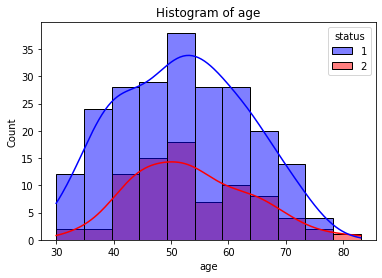

In [ ]:
#Graph1 Plotting Histogram of age
fig, ax = plt.subplots()
sns.color_palette("pastel")
sns.histplot(haberman_df,x ="age",hue="status",kde=True,ax=ax,palette=['b', 'r'])
plt.title("Histogram of age")
plt.show()

**Observation**: 

*   Histogram of age looks like Guassian curve
*   Clearly we can see more number of people were classied as class 1(didn't survive after operation) 




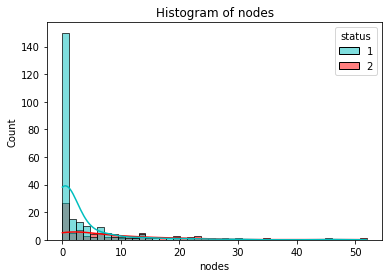

In [ ]:
#Graph2 Histogram for Nodes
fig, ax = plt.subplots()
sns.color_palette("pastel")
sns.histplot(haberman_df,x ="nodes",hue="status",kde=True,ax=ax, palette=['c','r'])
plt.title("Histogram of nodes")
plt.show()

**Observation:** Not able to get much information from above graph

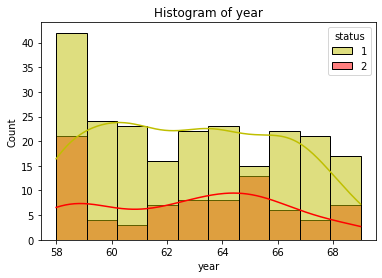

In [ ]:
#Graph3 Histogram for Year
fig, ax = plt.subplots()
sns.color_palette("pastel")
sns.histplot(haberman_df,x ="year",hue="status",kde=True,ax=ax, palette=['y','r'])
plt.title("Histogram of year")
plt.show()

**Observation:**

*  Variance is high and distribution of data is scattered.




[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


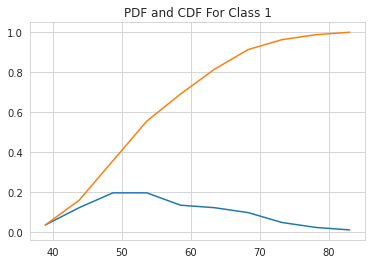

In [46]:
#cdf and pdf for based on age
counts, bin_edges = np.histogram(haberman_sucess['age'], bins = 10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
fig, ax = plt.subplots(1,1)
ax.set_xlabel=('age')
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("PDF and CDF For Class 2")
plt.xlable=("age")
plt.show()

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


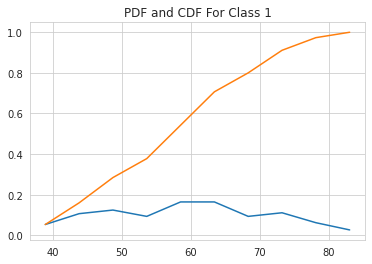

In [43]:
counts_2, bin_edges_2 = np.histogram(haberman_failure['age'], bins = 10, density = True)
pdf_2 = counts_2/(sum(counts_2))
print(pdf_2)
print(bin_edges_2)
cdf_2 = np.cumsum(pdf_2)
plt.plot(bin_edges[1:], pdf_2)
plt.plot(bin_edges[1:], cdf_2)
plt.title("PDF and CDF For Class 1")
plt.show()

**Observation:**
1. We can see variation of age is large and distribution is not Normal.
2. By seeing PDF for class 2 we see that probability of sucess is less after age of around 52.



# Mean Variance Standard Deviation

In [ ]:
#calculating mean and standard deviation for the feature age.
haberman_sucess =  haberman_df.loc[haberman_df["status"]==2]
haberman_failure = haberman_df.loc[haberman_df["status"]==1]
#Calculating mean for age
print("==MEAN==")
print(np.mean(haberman_sucess['age']))
print(np.mean(haberman_failure['age']))
print("=====================")
print("==Standard Deviation==")
#Calculating mean for std-dev
print("standard deviation of age for class 2(survived for > 5yrs after surgery)")
print( np.std(haberman_sucess['age']))
print("standard deviation of age for class 1(couldn't survive for > 5yrs after surgery)")
print(np.std(haberman_failure['age']))


==MEAN==
53.67901234567901
52.01777777777778
==Standard Deviation==
standard deviation of age for class 2(survived for > 5yrs after surgery)
10.10418219303131
standard deviation of age for class 1(couldn't survive for > 5yrs after surgery)
10.98765547510051


**Observation:** 


*   Mean age is class 1 is 54
*   Mean age is class 2 is 53
*   Spread of the age in both the classess is 11 years





# Median, Percentile, Quantile

In [ ]:
print("==========")
print("MEDIAN")
print("Median of age for class 2(survived for > 5yrs after surgery)")
print(np.median(haberman_sucess['age']))
print("standard deviation of age for class 1(couldn't survive for > 5yrs after surgery)")
print(np.median(haberman_failure['age']))


print("==========")
print("QUANTILES")
print("Quantile of age for class 2(survived for > 5yrs after surgery)")
print(np.percentile(haberman_sucess["age"],np.arange(0, 100, 25)))
print("Quantile of age for class 1(couldn't survive for > 5yrs after surgery)")
print(np.percentile(haberman_failure["age"],np.arange(0, 100, 25)))

print("==========")
print("PERCENTILES")
print("PERCENTILE of age for class 2(survived for > 5yrs after surgery)")
print(np.percentile(haberman_sucess["age"],90))
print("percentile of age for class 1(couldn't survive for > 5yrs after surgery)")
print(np.percentile(haberman_failure["age"],90))


MEDIAN
Median of age for class 2(survived for > 5yrs after surgery)
53.0
standard deviation of age for class 1(couldn't survive for > 5yrs after surgery)
52.0
QUANTILES
Quantile of age for class 2(survived for > 5yrs after surgery)
[34. 46. 53. 61.]
Quantile of age for class 1(couldn't survive for > 5yrs after surgery)
[30. 43. 52. 60.]
PERCENTILES
PERCENTILE of age for class 2(survived for > 5yrs after surgery)
67.0
percentile of age for class 1(couldn't survive for > 5yrs after surgery)
67.0


**observation**: 

*   Medianis also between 52-54, didn't change much from the mean, shows that there are not outliers in feature age.
* We can observe 90 percentile is same for both classes.



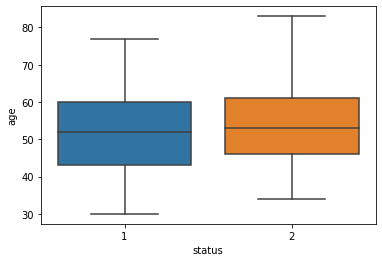

In [ ]:
#box plot for age
sns.boxplot(x='status',y='age', data=haberman_df)
plt.show()

**Observation** 
*   We can observe same information we got from the formaulation above of median and 25th and 75th quantile values just by looking at box plot





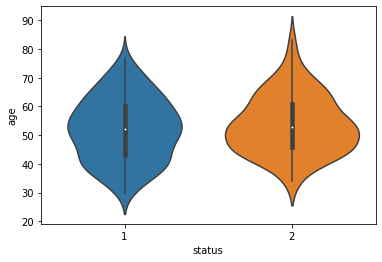

In [ ]:
#Violin plot for age
sns.violinplot(x="status", y="age", data=haberman_df, size=8)
plt.show()

**Observation:** Violin plot also gives us the median (white dot) 25th, 75th quantiles and the PDF of the distribution.

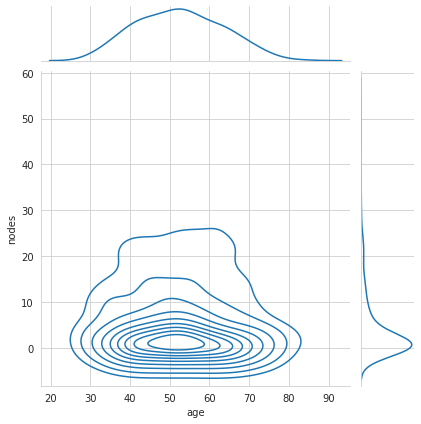

In [42]:
#Density Contour plot for age and nodes
sns.jointplot(x="age", y="nodes", data=haberman_df, kind="kde");
plt.show();

**Conclusion:**
1. Data is imbalanced.
2. As the age increased we see more points in class 1
3. With given dataset as per above analysis result, we see sucess rate after surgery is less.
4. Sucess rate was less for records having more number of nodes.
5. With limited number of features not able to arrive at solid data conclusions.
